<a href="https://colab.research.google.com/github/DHEEPAK-RAAJ-R/PROJECTS/blob/main/ML_PROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv('/content/Hotel_Reviews.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42762 entries, 0 to 42761
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               42762 non-null  object 
 1   Additional_Number_of_Scoring                42762 non-null  int64  
 2   Review_Date                                 42762 non-null  object 
 3   Average_Score                               42762 non-null  float64
 4   Hotel_Name                                  42762 non-null  object 
 5   Reviewer_Nationality                        42762 non-null  object 
 6   Negative_Review                             42762 non-null  object 
 7   Review_Total_Negative_Word_Counts           42762 non-null  int64  
 8   Total_Number_of_Reviews                     42762 non-null  int64  
 9   Positive_Review                             42762 non-null  object 
 10  Review_Tot

In [ ]:
df.isnull().sum()


Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             1
Total_Number_of_Reviews_Reviewer_Has_Given    1
Reviewer_Score                                1
Tags                                          1
days_since_review                             1
lat                                           1
lng                                           1
dtype: int64

In [ ]:
df=df.iloc[:10965,:]
df1=df

In [ ]:
df["review"] = df["Negative_Review"] + df["Positive_Review"]
df["is_bad_review"] = df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)
df = df[["review", "is_bad_review"]]
df

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0
...,...,...
10960,No Negative Convenient for my requirements,0
10961,Skirting boards in room in need of clean but ...,0
10962,Bedroom and bathroom too small Very pleasant ...,0
10963,The room was extremely small and the sheet an...,0


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 

def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")
 
 
   
# Driver code
if __name__ == "__main__" :
 
    print("\n1st statement :")
    sentence = "Geeks For Geeks is the best portal for \
                the computer science engineering students."
 
    # function calling
    sentiment_scores(sentence)
 
    print("\n2nd Statement :")
    sentence = "study is going on as usual"
    sentiment_scores(sentence)
 
    print("\n3rd Statement :")
    sentence = "I am very sad today."
    sentiment_scores(sentence)

In [ ]:
df2 =  pd.concat([df1, df], axis=1, join='inner')


In [ ]:
df2=df2.drop(columns=["Total_Number_of_Reviews_Reviewer_Has_Given","Tags","Reviewer_Nationality","days_since_review","Review_Date","lat","lng","Additional_Number_of_Scoring"])


In [ ]:
df2=df2.iloc[:,:11]
df2

,Hotel_Address,Hotel_Name,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Reviewer_Score,review,is_bad_review,review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,2.9,I am so angry that i made this post available...,1,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,No Negative,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.5,No Negative No real complaints the hotel was g...,0,No Negative No real complaints the hotel was g...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,7.1,Rooms are nice but for elderly a bit difficul...,0,Rooms are nice but for elderly a bit difficul...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,3.8,My room was dirty and I was afraid to walk ba...,1,My room was dirty and I was afraid to walk ba...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,6.7,You When I booked with your company on line y...,0,You When I booked with your company on line y...
...,...,...,...,...,...,...,...,...,...,...,...
10960,1 Inverness Terrace Westminster Borough London...,Grand Royale London Hyde Park,No Negative,0.0,6539.0,Convenient for my requirements,5.0,7.5,No Negative Convenient for my requirements,0,No Negative Convenient for my requirements
10961,1 Inverness Terrace Westminster Borough London...,Grand Royale London Hyde Park,Skirting boards in room in need of clean but ...,20.0,6539.0,Staff friendly hotel clean and lovely decor,8.0,8.8,Skirting boards in room in need of clean but ...,0,Skirting boards in room in need of clean but ...
10962,1 Inverness Terrace Westminster Borough London...,Grand Royale London Hyde Park,Bedroom and bathroom too small,6.0,6539.0,Very pleasant staff and good location,8.0,7.9,Bedroom and bathroom too small Very pleasant ...,0,Bedroom and bathroom too small Very pleasant ...
10963,1 Inverness Terrace Westminster Borough London...,Grand Royale London Hyde Park,The room was extremely small and the sheet an...,16.0,6539.0,No Positive,0.0,6.7,The room was extremely small and the sheet an...,0,The room was extremely small and the sheet an...


In [ ]:
df2.describe()

,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Reviewer_Score,is_bad_review
count,10965.000000,10965.000000,10965.000000,10965.000000,10965.000000
mean,20.894482,4393.400912,17.454902,8.108472,0.059188
std,31.644203,1999.699821,21.708474,1.756958,0.235988
min,0.000000,171.000000,0.000000,2.500000,0.000000
25%,2.000000,2619.000000,5.000000,7.100000,0.000000
50%,11.000000,4380.000000,11.000000,8.300000,0.000000
75%,27.000000,6117.000000,22.000000,9.600000,0.000000
max,397.000000,6539.000000,373.000000,10.000000,1.000000


In [ ]:
df.isnull()

,review,is_bad_review
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10960,False,False
10961,False,False
10962,False,False
10963,False,False


In [ ]:
plt.Figure(figsize=(20,20))
sns.pairplot(data=df2,corner=True)
plt.show()

ValueError: ignored

In [ ]:
df2.columns

Index(['Hotel_Address', 'Hotel_Name', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Reviewer_Score', 'review', 'is_bad_review', 'review'],
      dtype='object')

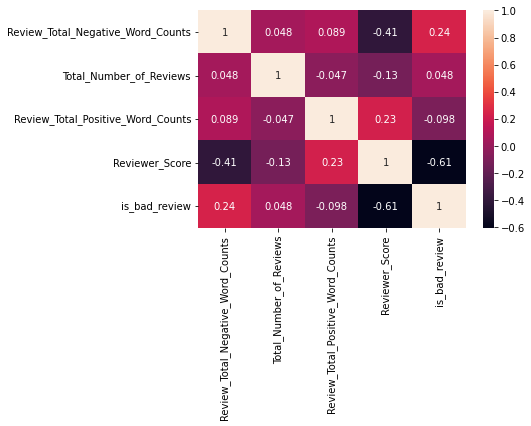

In [ ]:
corr=df2.corr()
sns.heatmap(corr,annot=True)

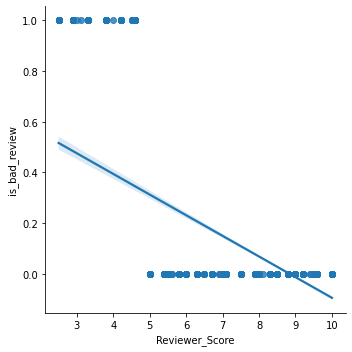

In [ ]:
sns.lmplot(y="is_bad_review",x="Reviewer_Score",data=df2)